In [3]:
import os
import pickle
import tensorflow as tf
from mido import MidiFile
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras.utils import to_categorical
import statistics 
from statistics import mode
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [23]:
files = []
songs = {}
genres = {}

In [113]:
def gettingFiles(files_dir):
    for r, d, f in os.walk(files_dir):
        for file in f:
            if '.mid' in file:
                files.append(os.path.join(r, file))


def getNoteRange():
    for file in files:
        vector = []
        mid = MidiFile(file)
        for i, track in enumerate(mid.tracks):
            for msg in track:
                if hasattr(msg, 'note'):
                    if msg.velocity != 0:
                        vector.append(msg.note)
        # print(vector)
        name = file[file.find("\\") + 1:]
        print(name)
        songs[name] = vector
    print(len(songs))

def getGenre():
    file = open("../MIDI_Genres/trainLabels.txt", "r");
    for line in file:
        index = line.find(",")
        name = line[0 : index]
        genre = line[index + 1 : index + 2]
        genres[name] = genre
        print(name + " : " + genre)

def avg(song):
    return sum(song) / len(song)

def common(song):
    return max(set(song), key = song.count)

def distance(song):
    return [song[i + 1] - song[i] for i in range(len(song) - 1)]

def histogram(song):
    songArray = np.array(song);
    hist, edges = np.histogram(songArray, np.arange(1, 121))
    return hist.tolist()

def distHistogram(dist):
    songArray = np.array(dist);
    hist, edges = np.histogram(songArray, np.arange(-120, 121))
    return hist.tolist()

In [25]:
gettingFiles('../MIDI_Genres/MIDI_Genres/train_set')
getNoteRange()
getGenre()

020-sati.mid
20th_century_fox.mid
435question.mid
57_1a_(c)bachovich.mid
73_3_(c)bachovich.mid
7thst.mid
87-15b.mid
99_ways_to_die.mid
a real mother for ya.mid
A-D-D.mid
ab-astor_tango.mid
ab-cumparsita_tango.mid
ab-johnny_b_goode.mid
ab-tutti_fruitti.mid
aces_high.mid
ACKER-GS.mid
ac_chantons.mid
Aenima.mid
against.mid
ahahohno.mid
aida1_celeste.mid
aida2fin.mid
AJobin-GirlIpanema.mid
AlbertKing-BornUnderBadSign.mid
aleigha.mid
AliceCooper_Elected.mid
alive.mid
allepsaa.mid
AllmanBrothers-BlueSky.mid
AllmanBrothers-InMemoryOfElizabethReedUnplugged.mid
AllmanBrothers-StatesBoroughBlues.mid
AllmanBrothers-WhippingPost.mid
allw_cp3.mid
All_The_Small_Things.mid
amorcomoelnuestro.mid
Amor_vittorioso.mid
angelaonmymind.mid
angelus.mid
animal.mid
another.mid
another_brick_in_the_wall.mid
anyplace.mid
anytime.mid
aqua-barbie_girl.mid
around.mid
around_the_world.mid
Astor-tango.mid
astor_tango.mid
atIknew.mid
atthehop.mid
At_Last.mid
AT_THE_CLUB.mid
av002a1.mid
av_molti2.mid
A_Cold_Day_In_Hell

sonata_19_1_(c)iscenko.mid
sonata_4_2_(c)iscenko.mid
SonnyBoyWilliamsonII-DontStartMeToTalking.mid
SonnyBWilliamson-YourFuberalMyTrial.mid
SonnyBWilliamsonII-UnSeenEye.mid
southern.mid
spice.mid
stairway_to_heaven.mid
start.mid
Stockhausen_StarSigns.mid
suddenly.mid
Suite_1.mid
sunflower.mid
surfin.mid
sweat01.mid
Sweet_16.mid
Sweet_Little_Sixteen.mid
symphony_088_2_(c)edwards.mid
symphony_092_1_(c)edwards.mid
symphony_183_2_(c)ishii.mid
symphony_35_385_3_(c)cvikl.mid
symphony_41_551_3_(c)cvikl.mid
takriver.mid
tallnom2.mid
tangoaa1.mid
TangoArg.mid
tangoen_wb.mid
tango_alaluzde.mid
tango_alousie.mid
tango_boedo.mid
tango_celos.mid
tango_chique.mid
tango_cumparsa.mid
tango_elchoclo.mid
tango_lapunial.mid
tango_t-uno.mid
tango_tangoarg.mid
tav_nom.mid
TBoneWalker-CallItStormyMonday.mid
TECHNO.mid
teddybea.mid
teen_idols-ketchup_soup.mid
temple_of_the_bull.mid
thank you for letting me be mice elf.mid
The On-Line Boogie.mid
these_arms_of_mine.mid
THE_BLUES_BROTHERS_FLIP_FLOP_BLUES.mid
THE

In [26]:
distinct_genres = []
for x in genres:
    if genres[x] not in distinct_genres:
        distinct_genres.append(genres[x])
print(distinct_genres)

['5', '6', '7', '3', '9']


In [129]:
songFeature = []
songGenre = []
for name in songs:
    song = songs[name]
    genre = genres[name]
    
    features = []
    features.append(min(song))
    features.append(max(song))
    features.append(avg(song))
    features.append(common(song))
    
    dist = distance(song)
    
    features.append(min(dist))
    features.append(max(dist))
    features.append(avg(dist))
    features.append(common(dist))
    
#     features.extend(histogram(song))
    features.extend(distHistogram(dist))
    
    songFeature.append(features)
    songGenre.append(distinct_genres.index(genre))
    
print('Finished!')
print(min(feature[4] for feature in songFeature))
print(max(feature[5] for feature in songFeature))

Finished!
-89
96


In [130]:
sc = StandardScaler()

x = numpy.array(songFeature)
y = numpy.array(songGenre)

x = sc.fit_transform(x)
y = to_categorical(y, num_classes=5)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15)
print(x_train)
print(y_train)
print('Finished!')
# print(len(x))
print(len(x[0]))

[[-0.25676763  1.48807623  0.16300481 ...  0.          0.
   0.        ]
 [ 0.13041806  0.27075312  0.05979416 ...  0.          0.
   0.        ]
 [-0.12770573  1.48807623  0.4734998  ...  0.          0.
   0.        ]
 ...
 [-0.12770573  1.28518904  2.41118667 ...  0.          0.
   0.        ]
 [ 0.13041806 -1.9610059  -1.14480223 ...  0.          0.
   0.        ]
 [-0.77301522  0.5750839  -0.09438512 ...  0.          0.
   0.        ]]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
Finished!
248


In [134]:
model = Sequential()
model.add(Dense(50, input_dim=248, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=25)

with open("final-3.3.pickle", "wb") as f:
    pickle.dump(model, f)

Train on 485 samples, validate on 86 samples
Epoch 1/25
485/485 [==============================] - 0s 222us/step - loss: 1.6681 - accuracy: 0.3278 - val_loss: 1.5152 - val_accuracy: 0.3488
Epoch 2/25
485/485 [==============================] - 0s 68us/step - loss: 1.3710 - accuracy: 0.4309 - val_loss: 1.3715 - val_accuracy: 0.4535
Epoch 3/25
485/485 [==============================] - 0s 60us/step - loss: 1.2274 - accuracy: 0.5299 - val_loss: 1.2937 - val_accuracy: 0.5116
Epoch 4/25
485/485 [==============================] - 0s 64us/step - loss: 1.1188 - accuracy: 0.6309 - val_loss: 1.2315 - val_accuracy: 0.5233
Epoch 5/25
485/485 [==============================] - 0s 58us/step - loss: 1.0214 - accuracy: 0.6598 - val_loss: 1.2008 - val_accuracy: 0.5116
Epoch 6/25
485/485 [==============================] - 0s 56us/step - loss: 0.9397 - accuracy: 0.6928 - val_loss: 1.1737 - val_accuracy: 0.5349
Epoch 7/25
485/485 [==============================] - 0s 58us/step - loss: 0.8723 - accuracy: 0.

In [125]:
pickle_in = open("final-3.2.pickle", "rb")
model = pickle.load(pickle_in)

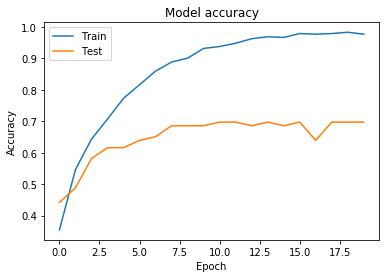

y: 4 , y_pred: 4
y: 2 , y_pred: 2
y: 3 , y_pred: 0
y: 4 , y_pred: 4
y: 2 , y_pred: 2
y: 1 , y_pred: 1
y: 3 , y_pred: 4
y: 1 , y_pred: 1
y: 4 , y_pred: 4
y: 3 , y_pred: 3
y: 2 , y_pred: 2
y: 4 , y_pred: 2
y: 1 , y_pred: 3
y: 2 , y_pred: 2
y: 0 , y_pred: 0
y: 1 , y_pred: 1
y: 1 , y_pred: 1
y: 2 , y_pred: 2
y: 2 , y_pred: 2
y: 0 , y_pred: 0
y: 1 , y_pred: 1
y: 3 , y_pred: 3
y: 3 , y_pred: 2
y: 1 , y_pred: 1
y: 0 , y_pred: 1
y: 4 , y_pred: 0
y: 3 , y_pred: 4
y: 3 , y_pred: 2
y: 3 , y_pred: 0
y: 1 , y_pred: 3
y: 1 , y_pred: 1
y: 0 , y_pred: 0
y: 2 , y_pred: 2
y: 2 , y_pred: 2
y: 0 , y_pred: 0
y: 1 , y_pred: 1
y: 2 , y_pred: 2
y: 3 , y_pred: 0
y: 4 , y_pred: 3
y: 0 , y_pred: 3
y: 2 , y_pred: 2
y: 4 , y_pred: 0
y: 0 , y_pred: 0
y: 2 , y_pred: 2
y: 2 , y_pred: 2
y: 0 , y_pred: 0
y: 4 , y_pred: 4
y: 3 , y_pred: 0
y: 0 , y_pred: 0
y: 1 , y_pred: 1
y: 3 , y_pred: 3
y: 4 , y_pred: 3
y: 4 , y_pred: 2
y: 0 , y_pred: 1
y: 4 , y_pred: 4
y: 2 , y_pred: 2
y: 0 , y_pred: 0
y: 2 , y_pred: 2
y: 1 , y_pred:

In [126]:
y_pred = model.predict(x_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
    

for i in range(len(x_test)):
    y_t = test[i]
    y_p = pred[i]
    
    print("y: " + str(y_t) + " , y_pred: " + str(y_p))
   